In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import dendrogram, linkage

In [3]:
# Load the dataset
url = 'https://github.com/RAHULKASHYAP02/Credit-Card-Segmentation/raw/master/CC%20GENERAL.csv'
data = pd.read_csv(url)

In [4]:
# Display the first few rows of the dataset
print(data.head())

  CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000       

In [10]:
# Check for missing values
print(data.isnull().sum())

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64


In [11]:
#Drop rows with missing values
data = data.dropna()

In [12]:
# Select relevant features for clustering
X = data[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT']].values

In [13]:
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [14]:
# Apply Agglomerative Hierarchical Clustering
model = AgglomerativeClustering(n_clusters=4)  # Change n_clusters as needed
clusters = model.fit_predict(X_scaled)

In [15]:
# Add the cluster labels to the original dataset
data['Cluster'] = clusters

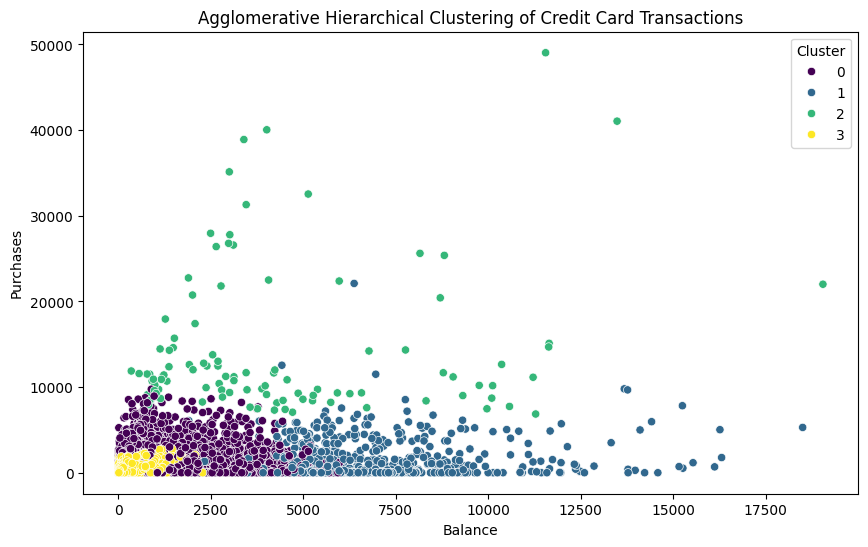

In [16]:
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='BALANCE', y='PURCHASES', hue='Cluster', palette='viridis')
plt.title('Agglomerative Hierarchical Clustering of Credit Card Transactions')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.legend(title='Cluster')
plt.show()